In [13]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# Importing the training set
dataset_train = pd.read_csv('/content/apple_stock_complete_data.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [18]:
dataset_train.head()

,Date,open,high,low,close,volume
0,12/12/1980,0.5134,0.5155,0.5134,0.5134,117258400
1,12/15/1980,0.4889,0.4889,0.4866,0.4866,43971200
2,12/16/1980,0.4530,0.4530,0.4509,0.4509,26432000
3,12/17/1980,0.4620,0.4643,0.4620,0.4620,21610400
4,12/18/1980,0.4755,0.4777,0.4755,0.4755,18362400


In [19]:
len(dataset_train)

9971

In [20]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [21]:
# Creating a data structure with 240 timesteps and 1 output
X_train = []
y_train = []
for i in range(240, 9971):
    X_train.append(training_set_scaled[i-240:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [22]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [23]:
X_train

array([[[8.62935285e-04],
        [7.95775455e-04],
        [6.97365745e-04],
        ...,
        [3.85689309e-04],
        [3.54713551e-04],
        [3.42652194e-04]],

       [[7.95775455e-04],
        [6.97365745e-04],
        [7.22036703e-04],
        ...,
        [3.54713551e-04],
        [3.42652194e-04],
        [3.54713551e-04]],

       [[6.97365745e-04],
        [7.22036703e-04],
        [7.59043140e-04],
        ...,
        [3.42652194e-04],
        [3.54713551e-04],
        [3.79384509e-04]],

       ...,

       [[5.60281293e-01],
        [5.58801035e-01],
        [5.58663974e-01],
        ...,
        [9.97258782e-01],
        [1.00000000e+00],
        [9.88212765e-01]],

       [[5.58801035e-01],
        [5.58663974e-01],
        [5.63570754e-01],
        ...,
        [1.00000000e+00],
        [9.88212765e-01],
        [9.98382682e-01]],

       [[5.58663974e-01],
        [5.63570754e-01],
        [5.57704548e-01],
        ...,
        [9.88212765e-01],
        [9.9838

In [24]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))




# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)


Epoch 1/50
9731/9731 [==============================] - 164s 17ms/step - loss: 0.0020
Epoch 2/50
9731/9731 [==============================] - 178s 18ms/step - loss: 6.3025e-04
Epoch 3/50
9731/9731 [==============================] - 174s 18ms/step - loss: 7.2516e-04
Epoch 4/50
9731/9731 [==============================] - 174s 18ms/step - loss: 4.4501e-04
Epoch 5/50
9731/9731 [==============================] - 175s 18ms/step - loss: 5.6177e-04
Epoch 6/50
9731/9731 [==============================] - 172s 18ms/step - loss: 4.2559e-04
Epoch 7/50
9731/9731 [==============================] - 176s 18ms/step - loss: 4.4986e-04
Epoch 8/50
9731/9731 [==============================] - 173s 18ms/step - loss: 4.0016e-04
Epoch 9/50
9731/9731 [==============================] - 175s 18ms/step - loss: 4.3073e-04
Epoch 10/50
9731/9731 [==============================] - 175s 18ms/step - loss: 4.3760e-04
Epoch 11/50
9731/9731 [==============================] - 178s 18ms/step - loss: 3.5788e-04
Epoch 12/50


In [36]:
# Part 3 - Making the predictions and visualising the results

# Our test set contains Jul 2020 month stock predictions
dataset_test = pd.read_csv('/content/apple_stock_test_data.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values



# # Our test set contains Jul 2020 month stock predictions
dataset_total = pd.concat((dataset_train['open'], dataset_test['open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 240:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(240, 262):
    X_test.append(inputs[i-240:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)



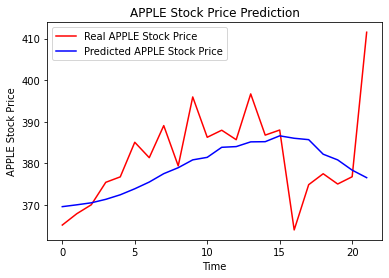

In [42]:

# Visualising the results
# Our test set contains Jul 2020 month stock predictions
plt.plot(real_stock_price, color = 'red', label = 'Real APPLE Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted APPLE Stock Price')
plt.title('APPLE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show()

#As you can see that predicted stock prices are close to actual prices except at the end point (end month of Jul)
#Algorithm is unable to predict very well for month end stock price (Jul 2020) because there was one time event happened where Apple has announced the stock split during last week of Jul 2020 and the stock price has increased to $40 dollars in a single day. The split stock events are very rare
